# Support Vector Machine - Regression

<h3> 1: Prepration </h3>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataSet
dataset =  pd.read_csv('.\datasets\Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# Defining X
X = dataset.iloc[:, 1:2].values
X.shape

(10, 1)

In [4]:
# Defining y
y = dataset.iloc[:, -1].values
y.shape

(10,)

<h3> 2: Cleaning </h3>

In [5]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
y = y.reshape(len(y))

<h3> 3: Modelling </h3>

In [12]:
# Model
from sklearn.svm import SVR
regressor = SVR(gamma='auto')

In [13]:
# Fitting
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<h3> 4: Predicting </h3>

In [21]:
# Predicting
y_pred = regressor.predict(X)
pred = sc_y.inverse_transform(regressor.predict(sc_X.fit_transform([[6.5]])))
pred

array([131106.77303274])

In [22]:
# score
from sklearn.metrics import mean_squared_error, r2_score
sm = mean_squared_error(y, y_pred)
sr = r2_score(y, y_pred)
sm, sr

(0.24839989293792014, 0.7516001070620798)

<h3> 5: Visualizing </h3>

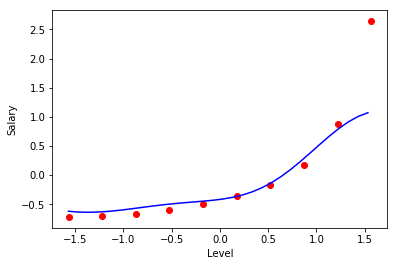

In [23]:
# Visual
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()